In [ ]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np


LOADING DATA


In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

PREPROCESSING THE DATA 


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [ ]:
model = Sequential()


In [ ]:
# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 561s 1s/step - loss: 1.8523 - accuracy: 0.3068 - val_loss: 1.1992 - val_accuracy: 0.5640
Epoch 2/10
391/391 [==============================] - 560s 1s/step - loss: 1.1900 - accuracy: 0.5748 - val_loss: 0.9579 - val_accuracy: 0.6631
Epoch 3/10
391/391 [==============================] - 562s 1s/step - loss: 0.9555 - accuracy: 0.6637 - val_loss: 0.8224 - val_accuracy: 0.7119
Epoch 4/10
391/391 [==============================] - 562s 1s/step - loss: 0.8236 - accuracy: 0.7095 - val_loss: 0.7481 - val_accuracy: 0.7383
Epoch 5/10
391/391 [==============================] - 559s 1s/step - loss: 0.7230 - accuracy: 0.7480 - val_loss: 0.7729 - val_accuracy: 0.7282
Epoch 6/10
391/391 [==============================] - 560s 1s/step - loss: 0.6571 - accuracy: 0.7692 - val_loss: 0.7094 - val_accuracy: 0.7515
Epoch 7/10
391/391 [==============================] - 552s 1s/step - loss: 0.5967 - accuracy: 0.7884 - val_loss: 0.6764 - val_accuracy: 0.7629

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 29s 91ms/step - loss: 0.6773 - accuracy: 0.7728


[0.677250862121582, 0.7728000283241272]

PREDICTING 

In [ ]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 1s 568ms/step


In [ ]:
print (predictions)

[[4.06840554e-04 9.48373236e-06 2.26644501e-02 8.78300983e-03
  4.30203885e-01 6.08533211e-02 1.77734881e-04 4.76684511e-01
  3.46609813e-05 1.82036441e-04]
 [1.65464403e-03 2.76737206e-04 2.13123076e-02 3.99003476e-01
  2.32340526e-02 4.27963227e-01 5.26875816e-03 1.14876255e-01
  1.24683802e-03 5.16380230e-03]
 [7.96655222e-05 7.46873207e-04 1.70688685e-02 1.13035496e-02
  1.44751393e-03 1.75519157e-02 9.50108528e-01 8.45422386e-04
  3.85978114e-04 4.61620861e-04]
 [6.25732064e-05 3.69342342e-06 4.56813676e-03 9.48651016e-01
  5.11213718e-03 1.55181689e-02 2.50423625e-02 5.49856864e-04
  4.74092340e-05 4.44626086e-04]
 [3.57195177e-07 9.99309301e-01 1.44896742e-11 1.07623231e-12
  2.34051927e-13 2.42998411e-13 9.36836581e-11 1.02260641e-13
  3.22695405e-06 6.87164662e-04]
 [1.22773035e-05 9.99685407e-01 6.86589843e-08 9.42404981e-08
  4.48193394e-09 4.54506122e-09 2.16993172e-07 4.64495914e-10
  1.41238765e-04 1.60712108e-04]
 [2.16391068e-02 1.24939075e-02 3.78390625e-02 2.83850044e

In [ ]:
for image in predictions:
    print(np.sum(image))

1.0
1.0
1.0
1.0
1.0
1.0000001
0.99999994
0.99999994
1.0


In [ ]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[7 5 6 3 1 1 5 6 8]


FINAL OBJECT DETECTION 

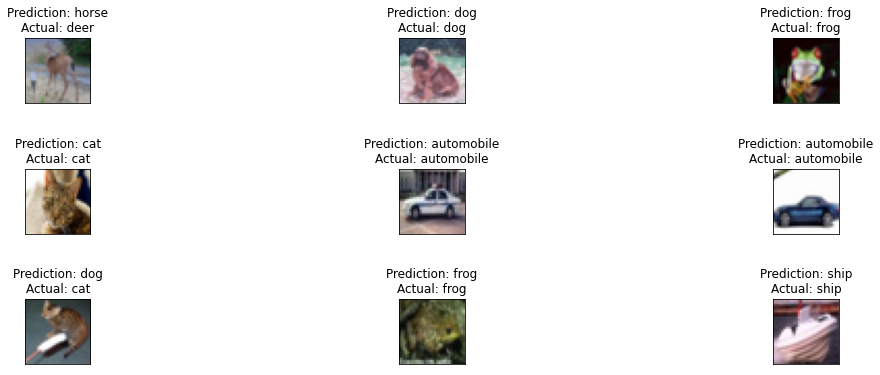

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()